In [1]:
import numpy as np
from itertools import combinations
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import matplotlib
import sys
sys.path.append('../scores')
from interactions import *
from pdpbox import pdp
import pandas as pd
import os
from scipy.stats import random_correlation
from copy import deepcopy
from os.path import join as oj
from tqdm import tqdm
import pickle as pkl
import seaborn as sns
from run_sim import *
plt.rcParams["font.family"] = "Times New Roman"
font = {'family' : 'normal',
        'size'   : 13}

matplotlib.rc('font', **font)


In [9]:
num_vars = 5
seed = 1
from run_sim import get_means_and_cov
np.random.seed(seed)
means, covs1 = get_means_and_cov(num_vars, fix_eigs='iid')

np.random.seed(seed)
means, covs2 = get_means_and_cov(num_vars, fix_eigs=False)

np.random.seed(seed)
means, covs3 = get_means_and_cov(num_vars, fix_eigs=True)

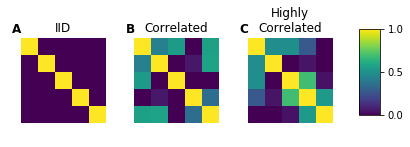

In [74]:
R, C = 1, 3
# fig, axes = plt.subplots(nrows=R, ncols=C)
# plt.figure(figsize=(6, 2))

fig, axes = plt.subplots(R, C, figsize=(6, 2))

axes.flat[0].imshow(covs1, vmin=0)
axes.flat[0].axis('off')
axes[0].title.set_text('IID')
axes[0].text(-1, -1, "A", size=12, fontweight='bold', verticalalignment='center') #, rotation=270)


axes.flat[1].imshow(covs2, vmin=0)
axes.flat[1].axis('off')
axes[1].title.set_text('Correlated')
# axes[1].title.set_size('Correlated')
axes[1].text(-1, -1, "B", size=12, fontweight='bold', verticalalignment='center') #, rotation=270)

im = axes.flat[2].imshow(covs3, vmin=0)
axes.flat[2].axis('off')
axes[2].title.set_text('Highly\nCorrelated')
axes[2].text(-1, -1, "C", size=12, fontweight='bold', verticalalignment='center') #, rotation=270)

plt.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.21, 0.05, 0.6]) # rect = l,b,w,h
fig.colorbar(im, cax=cbar_ax)
plt.savefig('covs.pdf')
plt.show()